# Data Cleaning and Data Visualization

## Background
The provided experimental data is recorded for the bio-chemcial reaction of producing gluconic acid from glucose for the purpose of building a reaction model.  
The measurements include the concentration of the reactants and product for different batches with different conditions.  

## Dataset
The data is provided in 2 files that correspond to the day the expirements were conducted.

## Objective
The main objective of this case study is clean and analyze the collected data before moving to the model development stage.

## Tasks
- Combine the 2 provided files into 1 dataset
- Identify and handle missing data points, outliers, or inconsistencies
- Validate data against physical and practical constraints
- Use appropriate data visualization methods to study the distribution of each parameter
- Use appropriate data visualization methods to study the effect of each parameter on the reaction product



<hr>

## Provide your answers below 
*Include explanation and insights for each step in `markdown` cells around your code

<hr>

<hr id="import">

<h2> Import Libraries</h2>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<hr id="import">

<h2>1. Combine the datasets </h2>

import dataset `day_1.csv`

In [37]:
df_1 = pd.read_csv('day_1.csv')
df_1.head()

,batch,glucose conc [g/l],biomass conc [g/l],DO [mg/l],gluconic acid conc [g/l]
0,1,100,1.0,10.0,6.416
1,2,150,2.0,10.0,48.015
2,3,120,2.0,15.0,27.100
3,4,150,2.5,15.0,57.946
4,5,150,3.0,15.0,57.389


import dataset `day_2.csv`

In [38]:
df_2 = pd.read_csv('day_2.csv')
df_2.head()

,batch,glucose conc [g/l],biomass conc [g/l],DO [g/l],gluconic acid conc [g/l]
0,26,100.0,2.0,0.015,7.829
1,27,150.0,2.0,0.015,57.261
2,28,120.0,2.0,0.020,31.486
3,29,150.0,2.0,NaN,66.900
4,30,150.0,2.5,0.020,67.449


integrate the data to be the same with the first dataset  `day_2.csv`

In [39]:
df_2['DO [g/l]'] = df_2['DO [g/l]']*1000
df_2.rename(columns={'DO [g/l]': 'DO [mg/l]'}, inplace=True)
df_2.head()

,batch,glucose conc [g/l],biomass conc [g/l],DO [mg/l],gluconic acid conc [g/l]
0,26,100.0,2.0,15.0,7.829
1,27,150.0,2.0,15.0,57.261
2,28,120.0,2.0,20.0,31.486
3,29,150.0,2.0,NaN,66.900
4,30,150.0,2.5,20.0,67.449


adding the two datasets to one dataframe

In [40]:
df_tot = pd.concat([df_1, df_2], ignore_index=True)
df_tot.head()

,batch,glucose conc [g/l],biomass conc [g/l],DO [mg/l],gluconic acid conc [g/l]
0,1,100.0,1.0,10.0,6.416
1,2,150.0,2.0,10.0,48.015
2,3,120.0,2.0,15.0,27.100
3,4,150.0,2.5,15.0,57.946
4,5,150.0,3.0,15.0,57.389


<h5>Explanation</h5>
<p>This step is to make a dataframe has two different datasets but the second one has a feature whose unit is different to the same feature of the first dataset so, at first it's important to handle this problem then the concatenation. </P>

<hr id="import">

<h2>2. Data Cleaning </h2>

if any conc lower than 0 remove the row


In [41]:
df_tot = df_tot[(df_tot['glucose conc [g/l]'] >= 0) & 
                (df_tot['biomass conc [g/l]'] >= 0) & 
                (df_tot['DO [mg/l]'] >= 0) & 
                (df_tot['gluconic acid conc [g/l]'] >= 0)]
df_tot.head()


,batch,glucose conc [g/l],biomass conc [g/l],DO [mg/l],gluconic acid conc [g/l]
0,1,100.0,1.0,10.0,6.416
1,2,150.0,2.0,10.0,48.015
2,3,120.0,2.0,15.0,27.100
3,4,150.0,2.5,15.0,57.946
4,5,150.0,3.0,15.0,57.389


<h4 id="clean-missing">Handle missing values</h4>

In [42]:
df_tot.isna().sum()

batch                       0
glucose conc [g/l]          0
biomass conc [g/l]          0
DO [mg/l]                   0
gluconic acid conc [g/l]    0
dtype: int64

In [43]:
avg_glucose_conc = df_tot['glucose conc [g/l]'].mean()
print(avg_glucose_conc)
df_tot['glucose conc [g/l]'].fillna(avg_glucose_conc, inplace=True)

144.575


In [44]:
avg_biomass_conc = df_tot['biomass conc [g/l]'].mean()
print(avg_biomass_conc)
df_tot['biomass conc [g/l]'].fillna(avg_biomass_conc, inplace=True)

2.425


In [45]:
avg_DO = df_tot['DO [mg/l]'].mean()
print(avg_DO)
df_tot['DO [mg/l]'].fillna(avg_DO, inplace=True)

38.0


In [46]:
df_tot.isna().sum()

batch                       0
glucose conc [g/l]          0
biomass conc [g/l]          0
DO [mg/l]                   0
gluconic acid conc [g/l]    0
dtype: int64

<h4 id="clean-missing">Handle Duplicates</h4>

In [47]:
df_tot.duplicated().sum()

1

In [48]:
# drop the duplicate rows
df_tot.drop_duplicates(inplace=True)
df_tot.duplicated().sum()

0

In [49]:
df_tot.describe()

,batch,glucose conc [g/l],biomass conc [g/l],DO [mg/l],gluconic acid conc [g/l]
count,39.000000,39.000000,39.000000,39.000000,39.000000
mean,22.743590,144.435897,2.435897,37.948718,143.002308
std,13.802589,21.835262,0.489085,18.627864,271.856100
min,1.000000,100.000000,1.000000,10.000000,6.416000
25%,11.000000,135.000000,2.000000,20.000000,52.638000
50%,23.000000,150.000000,2.500000,40.000000,111.328000
75%,35.000000,150.000000,3.000000,55.000000,154.230000
max,46.000000,180.000000,3.000000,60.000000,1760.490000


<h4 id="clean-missing">Handle Outliers</h4>

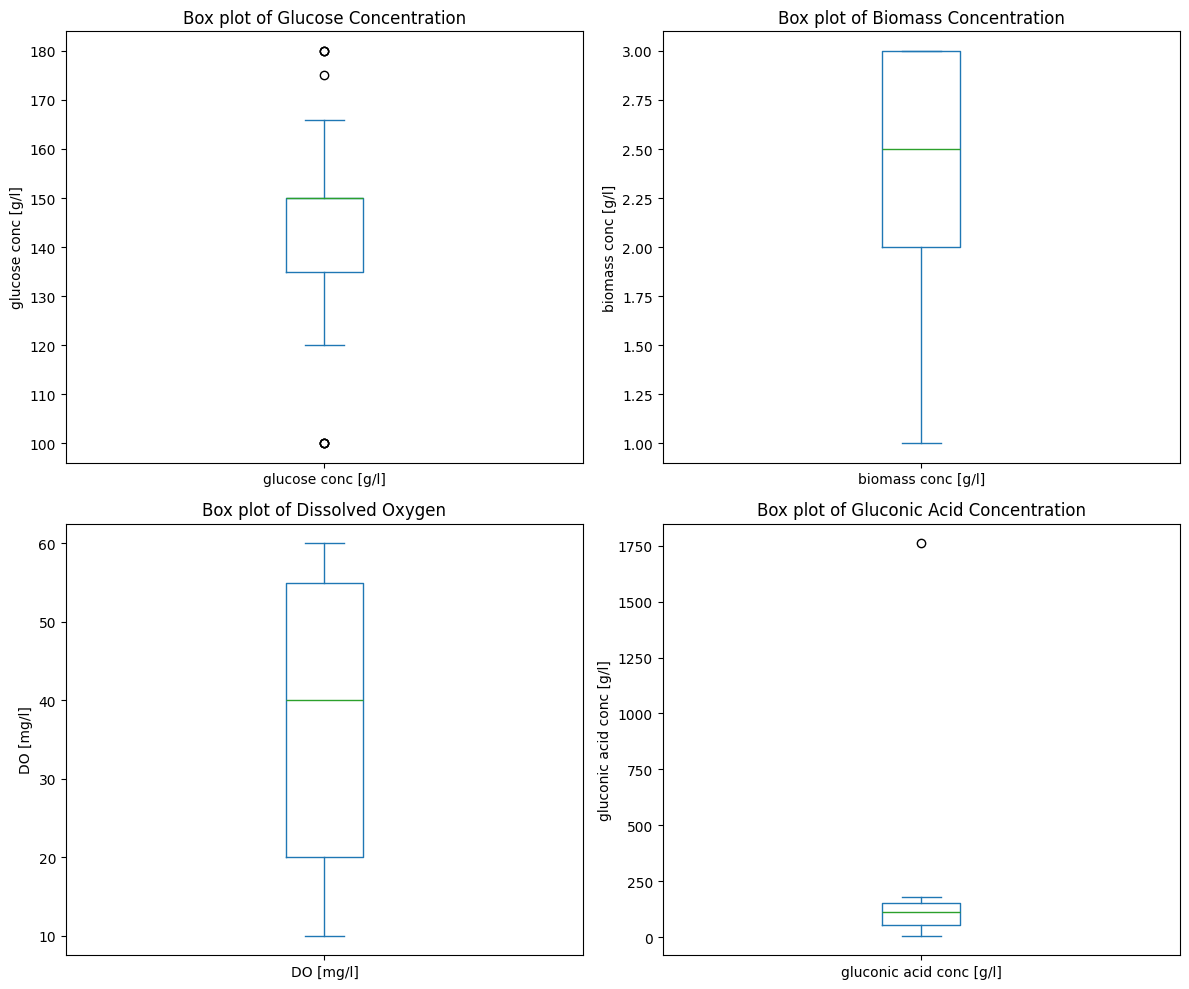

In [50]:

# Create a figure and a set of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot each box plot in a different subplot
df_tot['glucose conc [g/l]'].plot(kind='box', ax=axes[0, 0], title='Box plot of Glucose Concentration')
axes[0, 0].set_ylabel('glucose conc [g/l]')

df_tot['biomass conc [g/l]'].plot(kind='box', ax=axes[0, 1], title='Box plot of Biomass Concentration')
axes[0, 1].set_ylabel('biomass conc [g/l]')

df_tot['DO [mg/l]'].plot(kind='box', ax=axes[1, 0], title='Box plot of Dissolved Oxygen')
axes[1, 0].set_ylabel('DO [mg/l]')

df_tot['gluconic acid conc [g/l]'].plot(kind='box', ax=axes[1, 1], title='Box plot of Gluconic Acid Concentration')
axes[1, 1].set_ylabel('gluconic acid conc [g/l]')

# Adjust layout
plt.tight_layout()
plt.show()



In [51]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for each relevant column
df_tot = remove_outliers(df_tot, 'glucose conc [g/l]')
df_tot = remove_outliers(df_tot, 'biomass conc [g/l]')
df_tot = remove_outliers(df_tot, 'DO [mg/l]')
df_tot = remove_outliers(df_tot, 'gluconic acid conc [g/l]')

df_tot.describe()

,batch,glucose conc [g/l],biomass conc [g/l],DO [mg/l],gluconic acid conc [g/l]
count,31.000000,31.000000,31.000000,31.000000,31.000000
mean,22.548387,145.741935,2.483871,37.580645,104.671290
std,14.113442,13.463451,0.437490,17.695148,49.346317
min,2.000000,120.000000,2.000000,10.000000,22.952000
25%,9.500000,150.000000,2.000000,22.500000,57.667500
50%,20.000000,150.000000,2.500000,35.000000,111.328000
75%,35.000000,150.000000,3.000000,55.000000,152.665000
max,46.000000,166.000000,3.000000,60.000000,169.450000


<h5>Explanation</h5>

<p>The concentration must be greater than zero so the first step is to remove the row which has any negative concentration then to start the data cleaning step by first handling missing values the missing values I'am not sure is MCAR or MAR but both could be handled by Mean Imputation then the duplicates which is one point only and at the end the outliers    </p>

<hr id="import">

<h2>3. Validation </h2>

<h3>Possible Relationships</h3>
<ul>
<li>Glucose Concentration vs. Gluconic Acid Concentration: As glucose is converted into gluconic acid, you would expect the concentration of glucose to decrease while the concentration of gluconic acid increases. This can help you determine the efficiency of the conversion process.</li>

<li>Biomass Concentration vs. Gluconic Acid Concentration: Higher biomass concentrations might lead to higher gluconic acid production, given that more microbial or enzymatic activity is available to catalyze the reaction.</li>

<li>Dissolved Oxygen vs. Gluconic Acid Concentration: Adequate dissolved oxygen is crucial for aerobic microbial activity, which may enhance gluconic acid production. You can analyze how variations in oxygen levels affect the production rate.</li>

<li>Batch vs. Other Variables: By comparing different batches, you can identify which conditions (such as temperature, pH, or nutrient availability) lead to optimal production of gluconic acid.</li>
</ul>

<hr id="import">

<h2>4. Visualization of Distribution </h2>

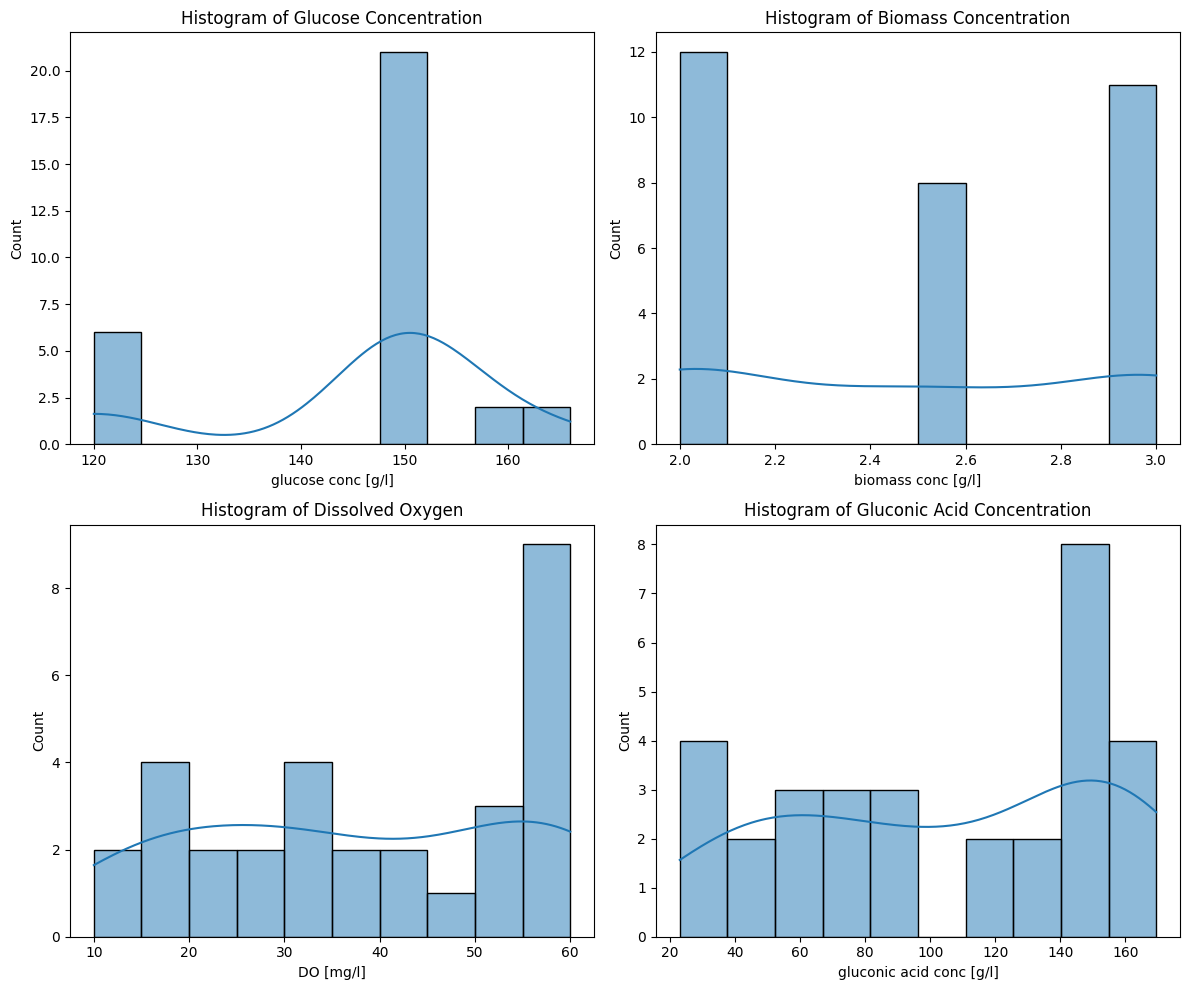

In [53]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot each histogram in a different subplot
sns.histplot(df_tot['glucose conc [g/l]'], bins=10, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Glucose Concentration')

sns.histplot(df_tot['biomass conc [g/l]'], bins=10, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Biomass Concentration')

sns.histplot(df_tot['DO [mg/l]'], bins=10, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Dissolved Oxygen')

sns.histplot(df_tot['gluconic acid conc [g/l]'], bins=10, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Histogram of Gluconic Acid Concentration')

# Adjust layout
plt.tight_layout()
plt.show()






<hr id="import">

<h2>5. Visualization of relations </h2>

<h3>Heat map</h3>

Text(0.5, 1.0, 'Correlation Matrix')

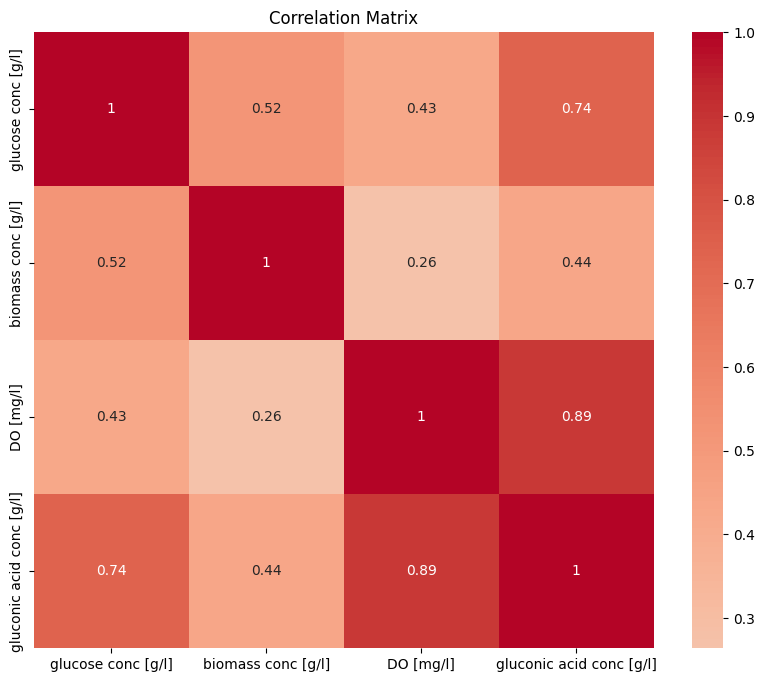

In [55]:
columns=['glucose conc [g/l]', 'biomass conc [g/l]', 'DO [mg/l]', 'gluconic acid conc [g/l]']


# create correlation matrix
corr_matrix = df_tot[columns].corr()

# create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)

# set title
plt.title('Correlation Matrix')

<h3>Scatter Plot between each variable and the product</h3>

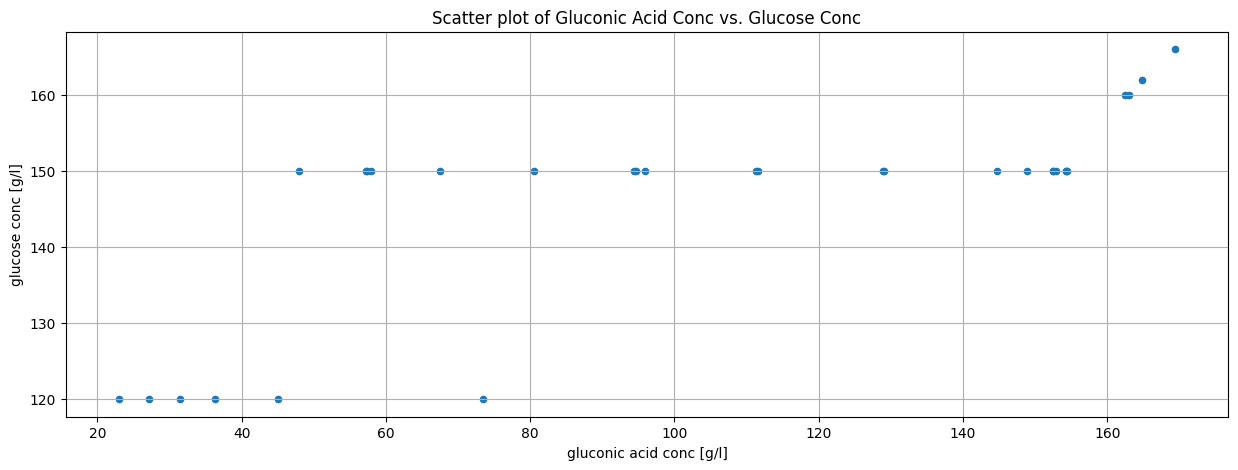

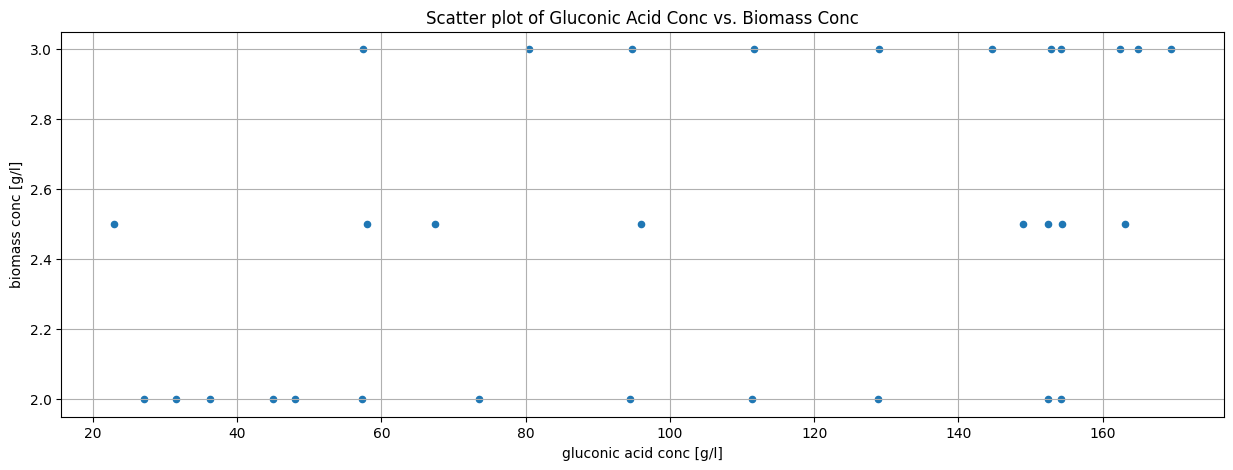

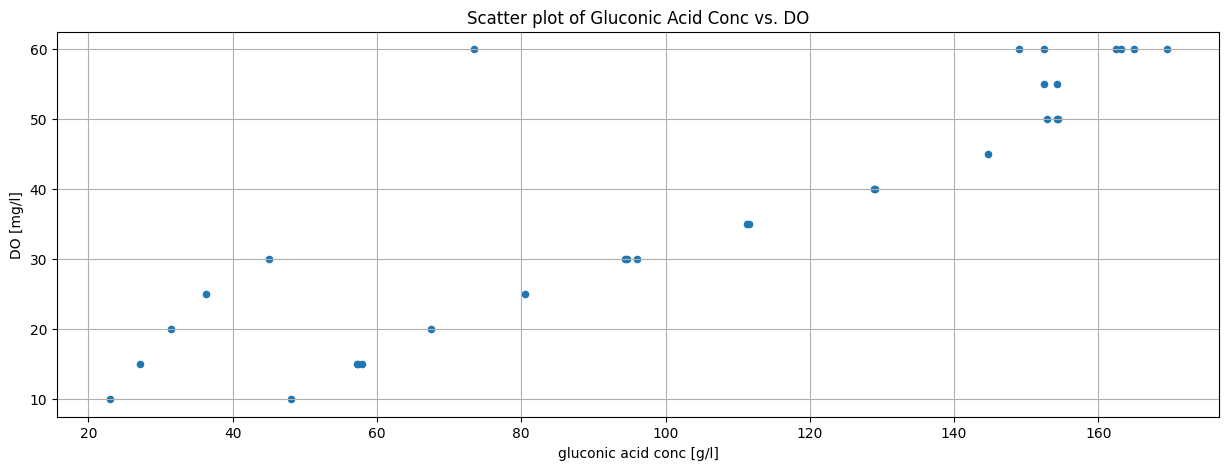

In [58]:
# scatter plot
df_tot.plot(kind='scatter', x='gluconic acid conc [g/l]', y='glucose conc [g/l]', title='Scatter plot of Gluconic Acid Conc vs. Glucose Conc', figsize=(15, 5))
# show grid lines
plt.grid()



# scatter plot
df_tot.plot(kind='scatter', x='gluconic acid conc [g/l]', y='biomass conc [g/l]', title='Scatter plot of Gluconic Acid Conc vs. Biomass Conc', figsize=(15, 5))
# show grid lines
plt.grid()


# scatter plot
df_tot.plot(kind='scatter', x='gluconic acid conc [g/l]', y='DO [mg/l]', title='Scatter plot of Gluconic Acid Conc vs. DO', figsize=(15, 5))
# show grid lines
plt.grid()


